In [5]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


import country_converter as coco

sns.set_style("darkgrid")

In [7]:
data = pd.read_csv("./data-final.csv", sep = "\t")

In [8]:
print("Dataset shape:", data.shape)

Dataset shape: (1015341, 110)


In [9]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [10]:
data.tail()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067
1015340,4.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:08:45,1920.0,1080.0,3.0,176.0,9,1,US,38.0,-97.0


In [12]:
data.isna().sum()

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
                         ... 
endelapse                   0
IPC                         0
country                    77
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64

In [13]:
s = data.isnull().sum()
print(s[s != 0])

EXT1           1783
EXT2           1783
EXT3           1783
EXT4           1783
EXT5           1783
               ... 
screenw        2066
screenh        2066
introelapse    2066
testelapse     1783
country          77
Length: 105, dtype: int64


In [14]:
print(s[s != 0].value_counts())

1783    101
2066      3
77        1
dtype: int64


In [15]:
data = data.dropna()

In [16]:
print("Dataset (new) shape:", data.shape)

Dataset (new) shape: (1012050, 110)


In [17]:
data.isna().sum()

EXT1                     0
EXT2                     0
EXT3                     0
EXT4                     0
EXT5                     0
                        ..
endelapse                0
IPC                      0
country                  0
lat_appx_lots_of_err     0
long_appx_lots_of_err    0
Length: 110, dtype: int64

In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012050 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 857.1+ MB


In [20]:
data.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

In [21]:
personality_traits = ["EXT", "AGR", "CSN", "EST", "OPN"]
answer_columns = [trait + str(number) for trait in personality_traits for number in range(1, 11)]
print(answer_columns)

['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']


In [22]:
(data[answer_columns] != data[answer_columns].astype(int)).sum()

EXT1     0
EXT2     0
EXT3     0
EXT4     0
EXT5     0
EXT6     0
EXT7     0
EXT8     0
EXT9     0
EXT10    0
AGR1     0
AGR2     0
AGR3     0
AGR4     0
AGR5     0
AGR6     0
AGR7     0
AGR8     0
AGR9     0
AGR10    0
CSN1     0
CSN2     0
CSN3     0
CSN4     0
CSN5     0
CSN6     0
CSN7     0
CSN8     0
CSN9     0
CSN10    0
EST1     0
EST2     0
EST3     0
EST4     0
EST5     0
EST6     0
EST7     0
EST8     0
EST9     0
EST10    0
OPN1     0
OPN2     0
OPN3     0
OPN4     0
OPN5     0
OPN6     0
OPN7     0
OPN8     0
OPN9     0
OPN10    0
dtype: int64

In [23]:
data[answer_columns] = data[answer_columns].astype(int)

C:\Users\Hridoy Alam\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [24]:
data.drop(["lat_appx_lots_of_err", "long_appx_lots_of_err"], axis = 1, inplace = True)

C:\Users\Hridoy Alam\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
data[answer_columns].apply(pd.Series.value_counts)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,3717,6091,6070,6886,9761,6181,8169,6365,6837,6258,...,9184,5936,7578,6657,7675,8120,8460,8018,7682,6171
1,249403,209781,76632,101861,98351,266184,236496,78056,173108,76378,...,43815,379557,23593,413184,16268,467024,15419,103843,19918,16574
2,198907,235137,191497,207888,178281,337682,227487,175505,220978,158031,...,102283,317113,72516,301369,59273,307824,56336,198022,56579,63468
3,288087,244322,268693,279681,234063,191087,194478,229599,214622,191047,...,250908,185837,174200,188717,272565,118668,180758,251759,127869,211764
4,191359,189956,283670,256806,298781,139337,197080,274541,241981,267835,...,331532,88613,313710,68946,395077,73393,401332,286140,343829,342825
5,80577,126763,185488,158928,192813,71579,148340,247984,154524,312501,...,274328,34994,420453,33177,261192,37021,349745,164268,456173,371248


In [26]:
data = data[(data[answer_columns] != 0).all(axis = 1)]

In [27]:
answer_columns_time = [trait + str(number) + "_E" for trait in personality_traits for number in range(1, 11)]
print(answer_columns_time)

['EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E']


In [28]:
data[answer_columns_time] = data[answer_columns_time].apply(lambda x: x / 1000)
data[answer_columns_time].describe()

,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
count,8.731730e+05,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,8.731730e+05,...,873173.000000,8.731730e+05,873173.000000,8.731730e+05,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000,873173.000000
mean,9.705712e+01,8.359547,9.211249,7.429495,7.237299,6.395441,7.944808,6.830886,5.817995,7.725020e+00,...,8.292178,1.317866e+01,7.041905,1.112716e+01,5.954429,8.088484,7.505491,5.164104,6.257384,4.456116
std,5.154761e+03,591.180732,940.311144,293.562065,639.771629,346.146220,270.554618,334.642970,155.785851,2.310106e+03,...,985.353272,1.296296e+03,375.517684,2.334657e+03,304.610449,548.766547,586.095281,225.002438,449.054027,244.271834
min,-4.295876e+04,-75.632000,-3593.866000,-2494.907000,-58.566000,-79.860000,-117.913000,-461.138000,-59.370000,-1.422380e+02,...,-53927.742000,-2.152050e+02,-417.031000,-7.446700e+01,-128.172000,-509.916000,-61.813000,-50.012000,-95.986000,-3594.871000
25%,4.803000e+00,2.393000,2.479000,2.418000,2.144000,2.193000,3.069000,2.543000,2.602000,2.265000e+00,...,2.088000,3.063000e+00,1.880000,2.694000e+00,1.996000,2.380000,2.296000,2.160000,2.346000,1.490000
50%,7.326000e+00,3.412000,3.488000,3.476000,3.017000,3.116000,4.349000,3.620000,3.650000,3.217000e+00,...,3.023000,4.244000e+00,2.751000,3.735000e+00,2.838000,3.336000,3.211000,3.052000,3.272000,2.186000
75%,1.219200e+01,5.058000,5.144000,5.222000,4.504000,4.608000,6.275000,5.373000,5.358000,4.702000e+00,...,4.541000,6.198000e+00,4.261000,5.509000e+00,4.263000,4.925000,4.717000,4.454000,4.770000,3.331000
max,2.147484e+06,261773.449000,605905.746000,98150.966000,351067.965000,166382.065000,90544.381000,247706.204000,88154.250000,2.147484e+06,...,675047.026000,1.026126e+06,193651.938000,2.147484e+06,162680.825000,272628.001000,389143.415000,169669.331000,347032.611000,153869.286000


In [29]:
data_time = data[((data[answer_columns_time] < 30) & (data[answer_columns_time] > 0)).all(axis = 1)]

In [30]:
print("Dataset (new) shape:", data_time.shape)

Dataset (new) shape: (593429, 108)


In [31]:
df_response = pd.melt(data_time[answer_columns_time])
df_response["trait"] = df_response["variable"].str.slice(0, 3)

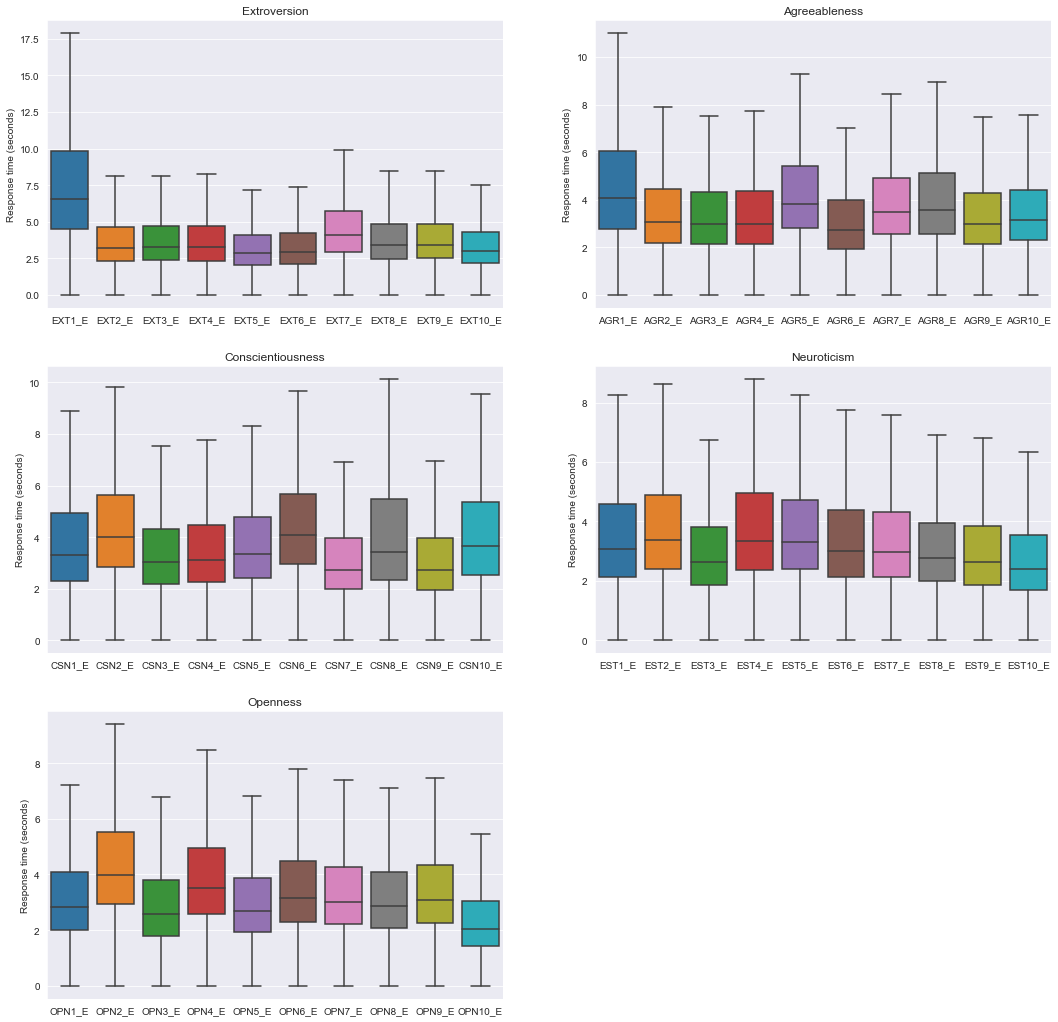

In [32]:
fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (18, 18))

sns.boxplot(x = "variable", y = "value", data = df_response[df_response["trait"] == "EXT"], 
            showfliers = False, ax = axs[0, 0]).set_title("Extroversion")
sns.boxplot(x = "variable", y = "value", data = df_response[df_response["trait"] == "AGR"], 
            showfliers = False, ax = axs[0, 1]).set_title("Agreeableness")
sns.boxplot(x = "variable", y = "value", data = df_response[df_response["trait"] == "CSN"], 
            showfliers = False, ax = axs[1, 0]).set_title("Conscientiousness")
sns.boxplot(x = "variable", y = "value", data = df_response[df_response["trait"] == "EST"], 
            showfliers = False, ax = axs[1, 1]).set_title("Neuroticism")
sns.boxplot(x = "variable", y = "value", data = df_response[df_response["trait"] == "OPN"], 
            showfliers = False, ax = axs[2, 0]).set_title("Openness")

fig.delaxes(axs[2, 1])

for ax in axs.flat:
    ax.set(xlabel = None, ylabel = "Response time (seconds)")

In [33]:
with open("./codebook.txt") as f:
    lines = f.readlines()
questions = lines[7:57]
questions = [x.replace("\n", "").split("\t") for x in questions]
questions = pd.DataFrame.from_records(questions, columns = ["code", "question"])
questions["wc"] = [len(x) for x in questions["question"].str.split()]
questions["lc"] = [len(x) for x in questions["question"]]
print(questions.head())

   code                           question  wc  lc
0  EXT1        I am the life of the party.   7  27
1  EXT2                I don't talk a lot.   5  19
2  EXT3  I feel comfortable around people.   5  33
3  EXT4          I keep in the background.   5  25
4  EXT5             I start conversations.   3  22


In [35]:
mean_response_time = data_time[answer_columns_time].mean()
df_mean_response_time = pd.DataFrame({"time": mean_response_time})
df_mean_response_time["code"] = df_mean_response_time.index.str.replace("_E", "")

df_mean_response_time = df_mean_response_time.merge(questions, on = "code")
print(df_mean_response_time.head())

       time  code                           question  wc  lc
0  7.989477  EXT1        I am the life of the party.   7  27
1  3.922643  EXT2                I don't talk a lot.   5  19
2  3.972671  EXT3  I feel comfortable around people.   5  33
3  3.947696  EXT4          I keep in the background.   5  25
4  3.522710  EXT5             I start conversations.   3  22


In [36]:
print("Pearson correlation coefficient between response time and words count:\n",np.corrcoef(df_mean_response_time["time"][1:], df_mean_response_time["wc"][1:])[0, 1])
print("Pearson correlation coefficient between response time and letters count:\n",
      np.corrcoef(df_mean_response_time["time"][1:], df_mean_response_time["lc"][1:])[0, 1])

Pearson correlation coefficient between response time and words count:
 0.50529030975512
Pearson correlation coefficient between response time and letters count:
 0.536352681465245
